 Bu veri seti, Eylül 2013'te Avrupa'daki kart sahiplerinin kredi kartı işlemlerini içeriyor. İki günlük bir dönemi kapsayan bu verilerde, 284.807 işlemden 492'si dolandırıcılık olarak işaretlenmiş, yani veri oldukça dengesizdir (sahtekarlık oranı %0.172). Veri seti yalnızca sayısal girdiler içeriyor ve çoğu değişken PCA (Ana Bileşen Analizi) ile dönüştürülmüş. 'V1'den 'V28'e kadar olan özellikler bu bileşenleri temsil ediyor. 'Time' ve 'Amount' özellikleri ise PCA ile dönüştürülmemiş orijinal özelliklerdir. 'Time', ilk işlem ile sonraki işlemler arasındaki zamanı, 'Amount' ise işlem tutarını ifade ediyor. Hedef değişken 'Class', dolandırıcılığı 1, diğer işlemleri ise 0 olarak sınıflandırıyor.

Veri Setinin Genel Bilgileri:
Veri setiniz 31 sütun ve 284,807 satır içeriyor. Sütunlar şunları içeriyor:
•	Time: Her işlemin başlangıç işleminden itibaren geçen süre (saniye cinsinden).
•	V1 ila V28: PCA dönüşümünden elde edilen 28 adet sayısal özellik.
•	Amount: İşlem miktarı.
•	Class: İşlemin dolandırıcılık olup olmadığını belirten etiket (0 = değil, 1 = evet).


In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd  # Veri işleme için
import matplotlib.pyplot as plt  # Veri görselleştirme için
import seaborn as sns  # Veri görselleştirme için

# CSV dosyasını pandas ile okuyalım
df = pd.read_csv('creditcard.csv')

# İlk 5 satırı gözlemleyelim, böylece veri setinin genel yapısını görebiliriz.
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Veri setinin özet istatistiklerini alın
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Veri Setinin Özet İstatistikleri:
Veri setimizin özet istatistikleri aşağıdaki gibidir:
•	Time:
o	Ortalama: 94,813.86 saniye
o	Standart Sapma: 47,488.15 saniye
o	Min: 0 saniye
o	Maks: 172,792 saniye
•	V1 - V28: PCA ile dönüştürülmüş 28 özellik
o	Ortalama: Özelliklerin çoğu ortalama etrafında dağılmış, genellikle sıfıra yakın değerler
o	Standart Sapma: Özellikler arasında belirgin değişkenlik var
o	Min/Max: Özellikler geniş bir değer aralığında (örneğin, V2 -5.64 ile 2.20 arasında)
•	Amount:
o	Ortalama: 88.35
o	Standart Sapma: 250.12
o	Min: 0
o	Maks: 25,691.16
•	Class:
o	Ortalama: 0.0017 (Bu, veri setinde dolandırıcılık işlemlerinin oranının çok düşük olduğunu gösterir, yaklaşık %0.17)
Bu özet, veri setindeki bazı temel eğilimleri ve değişkenlikleri gösterir. Özellikle, Amount sütunundaki yüksek standart sapma, bazı işlemlerin oldukça yüksek miktarlarda olduğunu ve veri setinde önemli bir varyans bulunduğunu gösterir.
Birkaç grafik görelim.


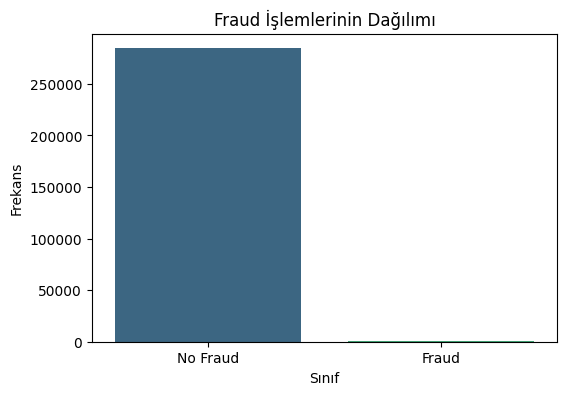

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sınıf (Fraud/No Fraud) dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis', hue='Class', legend=False)
plt.title('Fraud İşlemlerinin Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Frekans')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()


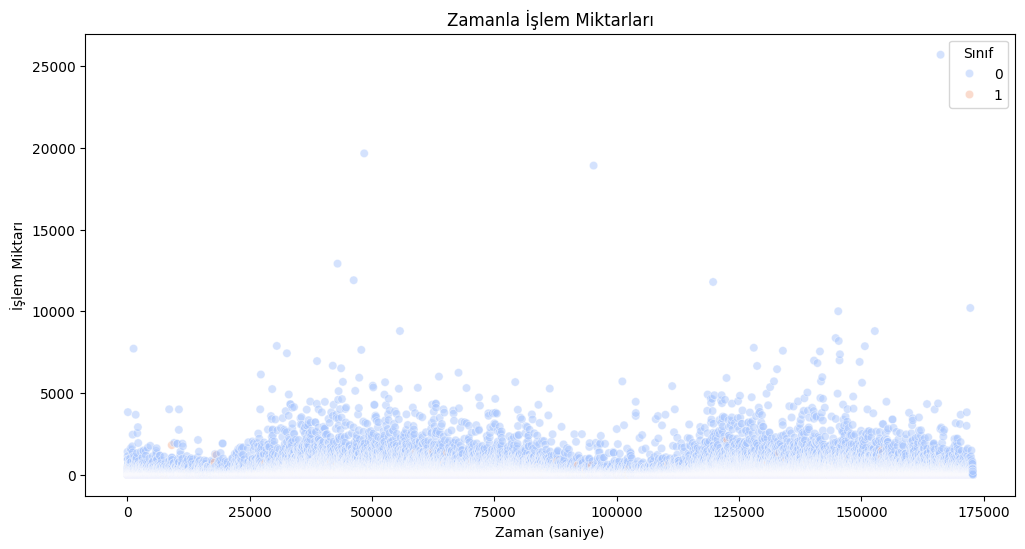

In [4]:
# Zamanla işlem miktarları
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette='coolwarm', alpha=0.5)
plt.title('Zamanla İşlem Miktarları')
plt.xlabel('Zaman (saniye)')
plt.ylabel('İşlem Miktarı')
plt.legend(title='Sınıf')
plt.show()


In [5]:
# Eksik değerleri kontrol et
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Veri setimizde eksik veri bulunmamaktadır. Yani, her bir sütunda eksik (NaN) değer yok. Bu iyi bir haber, çünkü eksik değerlerle başa çıkmak için ek bir adım atmanıza gerek kalmayacak.

4. Keşifsel Veri Analizi (EDA)
EDA aşamasında aşağıdaki adımları gerçekleştirebiliriz:
a) Sınıf Dağılımını İnceleme
Daha önce sınıf dağılımını gösteren bir countplot oluşturmuştuk. Dolandırıcılık işlemlerinin sayıca ne kadar az olduğunu görmüştük.
b) Korelasyon Matrisi
Özellikler arasındaki ilişkiyi görselleştirmek için bir korelasyon matrisi çıkarabiliriz. PCA ile dönüştürülmüş veriler olduğundan, korelasyonların nasıl dağıldığını görmek ilginç olabilir.


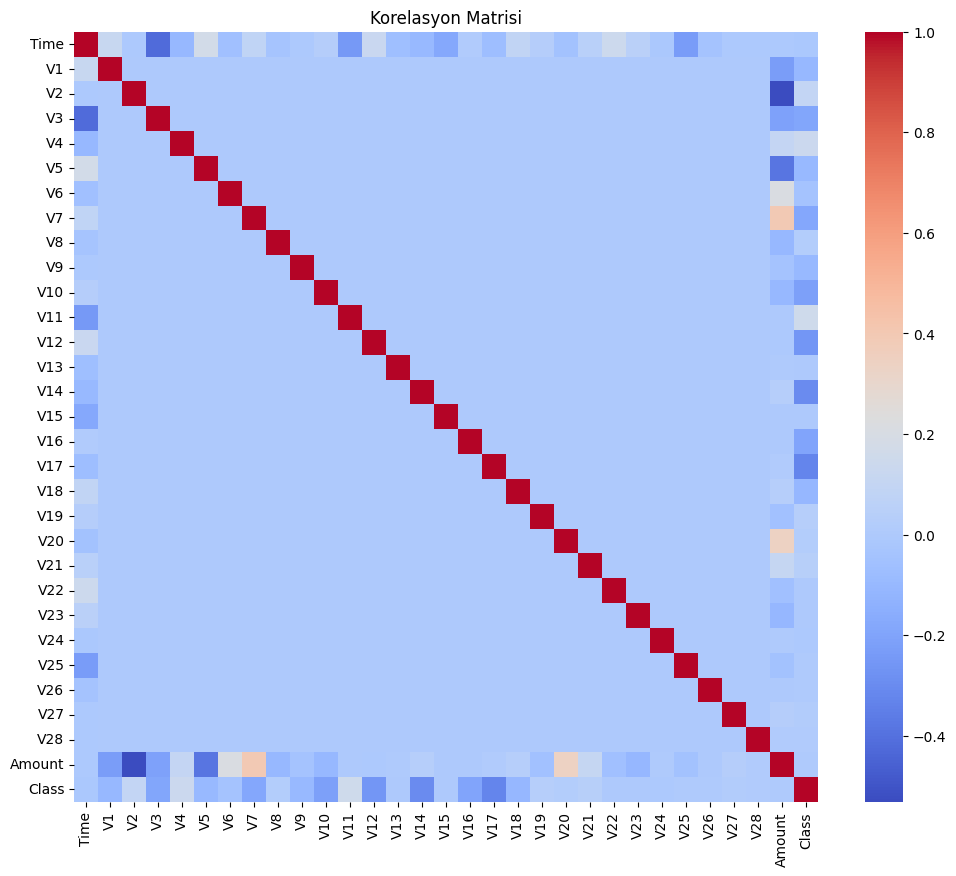

In [6]:
# Korelasyon matrisi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()


Bu grafik, tüm değişkenlerin birbiriyle olan korelasyonlarını gösterir. Özellikle Amount ve Time değişkenlerinin dolandırıcılık ile olan ilişkisini inceleyebiliriz. Bu değişkenler arasındaki ilişki nötr yani güçsüzdür.
c) İşlem Tutarlarının Dağılımı
İşlem tutarlarının (Amount) nasıl dağıldığını görmek için bir dağılım grafiği çizebiliriz.


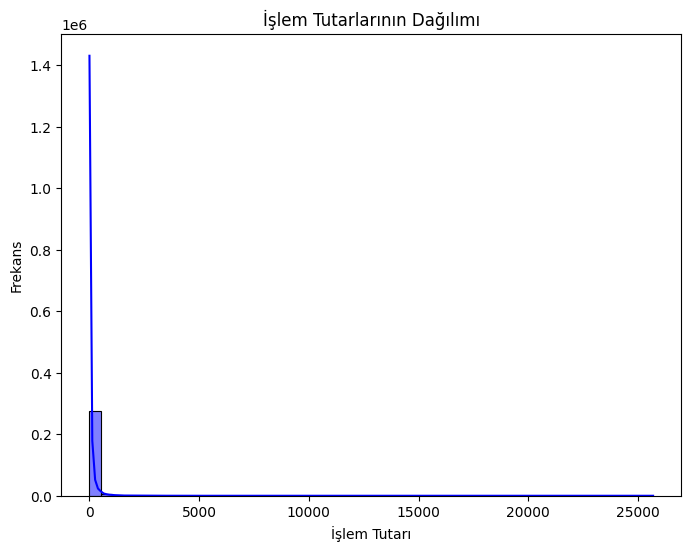

In [7]:
# İşlem tutarlarının dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('İşlem Tutarlarının Dağılımı')
plt.xlabel('İşlem Tutarı')
plt.ylabel('Frekans')
plt.show()


Bu grafik, işlem tutarlarının çoğunun düşük olduğunu ve birkaç yüksek değer olduğunu gösterebilir. Bu dağılım, büyük olasılıkla dolandırıcılık işlemlerinin de yüksek tutarlı işlemlerle ilişkili olup olmadığını anlamak için detaylı analizlere ihtiyaç duyulacağını belirtebilir.


d) Zamanla İşlem Sayısı
İşlemlerin zaman içerisindeki dağılımını incelemek için bir çizgi grafiği kullanabiliriz.


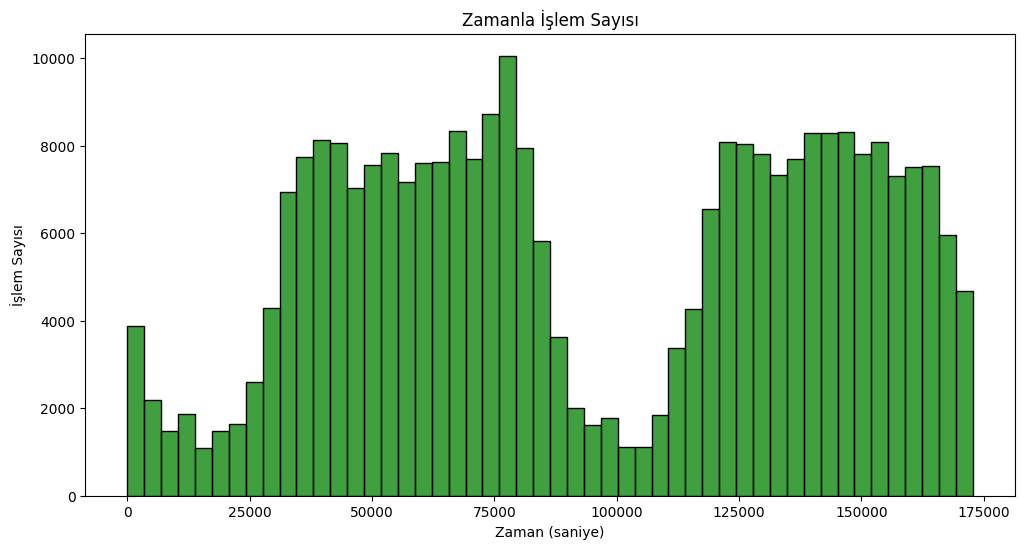

In [8]:
# Zamanla işlem sayısı
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=50, kde=False, color='green')
plt.title('Zamanla İşlem Sayısı')
plt.xlabel('Zaman (saniye)')
plt.ylabel('İşlem Sayısı')
plt.show()


Bu grafik, işlem sayısının zamanla nasıl değiştiğini ve belirli zaman aralıklarında daha yoğun olduğunu gösterebilir. Özellikle belirtilen zaman dilimlerinde yüksek işlem hacmi, belirli dönemlerde daha fazla işlem yapıldığını veya sistemde belirli zamanlarda yoğunluk yaşandığını belirtebilir. Bu bilgiyi dolandırıcılık analizinde kullanarak, dolandırıcılıkla ilişkili potansiyel zaman dilimlerini belirlemek için faydalı olabilir.

"5 - Veri Ön İşleme" aşamasına geldiğimizde, aşağıdaki adımları yapmamız gerekiyor. Daha önce eksik verileri kontrol ettik ve eksik veri olmadığını gördük, bu yüzden sonraki adımlar veri kümemizin özelliklerine göre uygulanmalı.
Yapılacaklar:
1.	Veri Temizleme: Eksik veri olmadığını gördük, bu adımı atlayabiliriz.
2.	Özellik Normalizasyonu: İşlem tutarı (Amount) ve zaman (Time) gibi özellikleri ölçeklendirmek önemli olabilir. Çünkü makine öğrenmesi modelleri özelliklerin ölçek farklılıklarından etkilenebilir. StandardScaler veya MinMaxScaler gibi bir ölçeklendirme tekniği kullanabiliriz.
3.	Label Encoding veya One-Hot Encoding: Veri setimizde kategorik değişken yok, çünkü tüm veriler sayısal ve Class zaten etiketlenmiş bir sütun. Bu yüzden bu adımı da atlayabiliriz.
4.	Veri Kümesini Eğitim ve Test Olarak Bölme: Eğitim ve test verilerine ayırarak modeli eğitmek ve değerlendirmek için train_test_split kullanacağız.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Amount ve Time sütunlarını ölçeklendirme
scaler = StandardScaler()
df['scaled_Amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_Time'] = scaler.fit_transform(df[['Time']])

# Ölçeklendirilmiş sütunlar eklendi, şimdi orijinal Amount ve Time sütunlarını kaldırabiliriz
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Veri setini bağımsız (X) ve bağımlı (y) değişkenlere ayırma
X = df.drop('Class', axis=1)
y = df['Class']

# Veri setini eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol edelim
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)


Eğitim seti boyutu: (227845, 30)
Test seti boyutu: (56962, 30)


Eğitim ve test setlerini başarıyla böldük. Eğitim setimiz 227,845 örnek içerirken, test setimiz 56,962 örnek içeriyor. Bu oran, modelimizin değerlendirme ve eğitim süreçleri için iyi bir denge sağlar.
Devam Edilmesi Gereken Adımlar:
1.	Model Seçimi ve Eğitimi:
o	Veri kümemizi uygun makine öğrenmesi modelleriyle eğitmek için başlayabiliriz. Kredi kartı dolandırıcılığı tespitinde genellikle kullanılan modeller arasında Logistic Regression, Decision Trees, Random Forests, Gradient Boosting ve Neural Networks yer alır.
2.	Model Değerlendirme:
o	Modelimizi eğittikten sonra, performansını değerlendirmek için çeşitli metrikler kullanabiliriz:
	AUC-ROC: Modelinizin dolandırıcılığı ne kadar iyi tespit ettiğini gösterir.
	Confusion Matrix: Doğru ve yanlış tahminlerinizi incelememizi sağlar.
	Precision, Recall, F1-Score: Sınıflandırma performansınızı detaylı bir şekilde değerlendirir.
3.	Hiperparametre Ayarlama:
o	Modelinizin performansını artırmak için hiperparametre optimizasyonu yapabiliriz. Grid Search veya Random Search yöntemlerini kullanarak en iyi hiperparametreleri bulabiliriz.
4.	Sonuçları Yorumlama ve Sunma:
o	Sonuçları yorumlayın ve bulgularınızı raporlayın. Özellikle dolandırıcılık işlemlerini doğru tespit etme oranımızı ve modelimizin hangi alanlarda güçlü veya zayıf olduğunu belirtin.


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Modeli oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=20, random_state=42)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Performans değerlendirmesi
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Sonuçları yazdırma
print(f"Confusion Matrix:\n{cm}\n")
print(f"Classification Report:\n{cr}\n")
print(f"AUC-ROC Score: {auc:.4f}")


Confusion Matrix:
[[56859     5]
 [   23    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962


AUC-ROC Score: 0.9332


True Negatives (TN): 56,859 (Dolandırıcılık olmayan işlemler doğru şekilde tahmin edildi)
False Positives (FP): 5 (Dolandırıcılık olmayan işlemler yanlışlıkla dolandırıcılık olarak tahmin edildi)
False Negatives (FN): 23 (Dolandırıcılık olan işlemler yanlışlıkla dolandırıcılık olmayan olarak tahmin edildi)
True Positives (TP): 75 (Dolandırıcılık olan işlemler doğru şekilde tahmin edildi)


Classification Report
•	Precision: Dolandırıcılık olarak tahmin edilen işlemlerin ne kadarının gerçekten dolandırıcılık olduğunu gösterir. Dolandırıcılık olan işlemler için 0.94, dolandırıcılık olmayan işlemler için 1.00.
•	Recall: Gerçek dolandırıcılık işlemlerinin ne kadarının doğru tahmin edildiğini gösterir. Dolandırıcılık olan işlemler için 0.77, dolandırıcılık olmayan işlemler için 1.00.
•	F1-Score: Precision ve Recall'ün harmonik ortalamasıdır. Dolandırıcılık olan işlemler için 0.84, dolandırıcılık olmayan işlemler için 1.00.
•	Accuracy: Modelin genel doğruluğunu gösterir. Toplamda %100'e yakın bir doğruluk elde edilmiş.
AUC-ROC Score
•	AUC-ROC Score: 0.9332. Bu skor, modelin genel performansını ve dolandırıcılık işlemlerini doğru tahmin etme yeteneğini gösterir. 1'e yakın bir değer, modelin iyi performans gösterdiğini belirtir.
Genel Yorumlar
•	Model oldukça yüksek bir doğruluk oranına sahip, ancak dolandırıcılık olan işlemler için recall değerinin daha düşük olduğunu gözlemleyebilirsiniz (0.77). Bu, modelin dolandırıcılık işlemlerini tespit etme yeteneğinin sınırlı olduğunu gösterir. Dolandırıcılık işlemleri genellikle nadir olaylardır ve bu nedenle, daha iyi bir model geliştirmek için daha fazla özellik mühendisliği veya hiperparametre optimizasyonu gerekebilir.
•	False Negatives sayısının (23) daha düşük olması, modelin dolandırıcılık işlemlerini tanımlama yeteneğinin geliştirilmesi gerektiğini işaret eder.
Eğer daha iyi sonuçlar elde etmek istiyorsak, modelin farklı hiperparametrelerle veya farklı algoritmalarla yeniden eğitilmesi gerekebilir. Ayrıca, veri dengesizliğini ele almak için çeşitli stratejiler (örneğin SMOTE gibi) uygulamak da faydalı olabilir.

Model Seçimi ve Çapraz Doğrulama
Farklı modelleri deneyip çapraz doğrulama ile performanslarını değerlendirebiliriz.


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Modelleri tanımla
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Çapraz doğrulama ile modelleri değerlendir
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='roc_auc')
    print(f"{name} AUC-ROC: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression AUC-ROC: 0.9756 ± 0.0023
K-Nearest Neighbors AUC-ROC: 0.9136 ± 0.0099
Support Vector Machine AUC-ROC: 0.9366 ± 0.0173


Algoritma Seçimi & Hiperparametre Optimizasyonu İçin Adımlar:
1.	Model Seçimi:
o	En yüksek AUC-ROC skoru Logistic Regression modeline ait (0.9756). Bu, modelimizin en iyi performansı gösterdiğini ve diğer iki modelden (KNN ve SVM) daha iyi olduğunu gösteriyor.
2.	Hiperparametre Optimizasyonu:
o	Şimdi Logistic Regression modelinin hiperparametrelerini optimize edebiliriz. Bu, Grid Search veya Randomized Search gibi yöntemlerle yapılabilir.

Örnek Hiperparametre Optimizasyonu (Grid Search) için Kod:


In [15]:
from sklearn.model_selection import GridSearchCV

# Hiperparametre ızgarası
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"En İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi AUC-ROC: {grid_search.best_score_:.4f}")

En İyi Parametreler: {'C': 0.01, 'solver': 'saga'}
En İyi AUC-ROC: 0.9823


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Bu çıktı, Lojistik Regresyon modelin için yapılan Grid Search sonucunda en iyi hiperparametre kombinasyonunu ve bu kombinasyonla elde edilen AUC-ROC skorunu gösteriyor.
Yorum:
•	En İyi Parametreler: {'C': 0.01, 'solver': 'saga'}:
o	C parametresi, Lojistik Regresyonda cezalandırma terimini kontrol eden bir hiperparametredir. Küçük bir C değeri (0.01) modelin daha güçlü bir şekilde düzenleme (regularization) yaptığı anlamına gelir, bu da overfitting'i önlemeye yardımcı olabilir.
o	solver: 'saga' ise Lojistik Regresyon için kullanılan optimizasyon algoritmasıdır. 'saga' büyük veri kümeleri ve L1/L2 regularization ile çalışmak için uygun bir yöntemdir.
•	En İyi AUC-ROC: 0.9823: Bu değer, modelin performansını ölçen bir metriktir. 0.9823, modelin sınıflandırma problemini çözmedeki doğruluğunun oldukça yüksek olduğunu gösterir. Bu AUC-ROC skoruyla, model hem pozitif hem de negatif sınıfları oldukça başarılı bir şekilde ayırıyor demektir.
Sonuç:
Bu hiperparametrelerle Lojistik Regresyon modelin oldukça iyi bir performans gösteriyor. Bundan sonra, modelin bu hiperparametrelerle test verisi üzerindeki performansını değerlendirebiliriz ve diğer modellerle karşılaştırabiliriz.

Eğitim aşamasında en iyi hiperparametreler belirlendiğine göre, şimdi test verisine geçelim ve modelin AUC-ROC skorunu ölçelim.


In [16]:
from sklearn.metrics import roc_auc_score

# En iyi modeli test verisi ile değerlendir
best_model = grid_search.best_estimator_
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Pozitif sınıfın olasılıklarını alıyoruz

# Test seti üzerinde AUC-ROC skoru
auc_roc_test = roc_auc_score(y_test, y_pred_prob)
print(f"Lojistik Regresyon Test AUC-ROC: {auc_roc_test:.4f}")


Lojistik Regresyon Test AUC-ROC: 0.9809


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Test verisi ile tahminler
y_pred = grid_search.best_estimator_.predict(X_test)
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Performans değerlendirmesi
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Sonuçları yazdırma
print(f"Confusion Matrix:\n{cm}\n")
print(f"Classification Report:\n{cr}\n")
print(f"AUC-ROC Score: {auc:.4f}")

Confusion Matrix:
[[56855     9]
 [   44    54]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962


AUC-ROC Score: 0.9809


 Lojistik Regresyon modelimizin test AUC-ROC skoru 0.9809, bu oldukça iyi bir sonuç Sonuçlara göre hiperparametre optimizasyonu yapılmış Lojistik Regresyon modeliyle devam etmemiz uygun görünüyor.
 Gözetimli Öğrenme Algoritmalarından, Lojistik Regresyon modelini seçtik ve Grid Search yöntemi ile hiperparametre optimizasyonu yaptık. Özellikle modelin C ve solver parametreleri için bir hiperparametre aralığı belirledik. Yaptığımız optimizasyon sonucunda en iyi parametreler {C: 0.01, solver: 'saga'} olarak bulundu ve modelin AUC-ROC performansı optimize edildi. Diğer modellerden daha iyi performans gösterdiği için bu modelle devam etmeye karar verdik.

7 - Model Değerlendirme
•	Confusion Matrix:
o	Gerçek negatif (0) ve pozitif (1) sınıflandırmalarda model çok yüksek doğruluk gösteriyor. Yani, 56855 doğru negatif ve 54 doğru pozitif sınıflama yapmış.
o	Modelin 9 yanlış negatif ve 44 yanlış pozitif sınıflaması var.
•	Classification Report:
o	Doğruluk (Accuracy): %100 (1.00), genel olarak modelin ne kadar doğru sınıflandırdığını gösterir.
o	Kesinlik (Precision): Pozitif sınıflar için %86 (0.86). Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir.
o	Duyarlılık (Recall): Pozitif sınıflar için %55 (0.55). Gerçek pozitif örneklerin ne kadarının doğru bir şekilde pozitif olarak sınıflandırıldığını gösterir.
o	F1 Puanı (F1 Score): Pozitif sınıflar için %67 (0.67). Kesinlik ve duyarlılığın harmonik ortalamasıdır.
•	AUC-ROC Score: 0.9809, modelin genel performansını iyi bir şekilde yansıtıyor. AUC-ROC skoru yüksek olduğunda, modelin sınıflandırma başarısı yüksektir.
Bu sonuçlar, modelimizin genel performansının oldukça iyi olduğunu ve doğru sınıflandırmalar gerçekleştirdiğini gösteriyor. Özellikle yüksek doğruluk, iyi AUC-ROC skoru ve detaylı raporlar, optimize edilmiş Lojistik Regresyon modelinin uygun olduğunu gösteriyor.
